In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.stats as stats

import pickle
import os

In [78]:
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns=100
plt.style.use('ggplot')
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 6.2; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/75.0.3770.100 Safari/537.36'}

In [79]:
standard_stats=pd.read_csv(r"C:\Users\berid\python\fbref_data\standard_stats.csv")
goalkeeping=pd.read_csv(r"C:\Users\berid\python\fbref_data\goalkeeping.csv")
advanced_goalkeeping=pd.read_csv(r"C:\Users\berid\python\fbref_data\advanced_goalkeeping.csv")
shooting=pd.read_csv(r"C:\Users\berid\python\fbref_data\shooting.csv")
passing=pd.read_csv(r"C:\Users\berid\python\fbref_data\passing.csv")
goal_and_shot_creation=pd.read_csv(r"C:\Users\berid\python\fbref_data\goal_and_shot_creation.csv")
defensive_actions=pd.read_csv(r"C:\Users\berid\python\fbref_data\defensive_actions.csv")
possession=pd.read_csv(r"C:\Users\berid\python\fbref_data\possession.csv")
playing_time=pd.read_csv(r"C:\Users\berid\python\fbref_data\playing_time.csv")
miscellaneous_stats=pd.read_csv(r"C:\Users\berid\python\fbref_data\miscellaneous_stats.csv")

In [80]:
standard_stats=standard_stats.query('`Unnamed: 0_level_0_Player`.isin(["Squad Total","Opponent Total"])==False')
goalkeeping=goalkeeping.query('`Unnamed: 0_level_0_Player`.isin(["Squad Total","Opponent Total"])==False')
advanced_goalkeeping=advanced_goalkeeping.query('`Unnamed: 0_level_0_Player`.isin(["Squad Total","Opponent Total"])==False')
shooting=shooting.query('`Unnamed: 0_level_0_Player`.isin(["Squad Total","Opponent Total"])==False')
passing=passing.query('`Unnamed: 0_level_0_Player`.isin(["Squad Total","Opponent Total"])==False')
goal_and_shot_creation=goal_and_shot_creation.query('`Unnamed: 0_level_0_Player`.isin(["Squad Total","Opponent Total"])==False')
defensive_actions=defensive_actions.query('`Unnamed: 0_level_0_Player`.isin(["Squad Total","Opponent Total"])==False')
possession=possession.query('`Unnamed: 0_level_0_Player`.isin(["Squad Total","Opponent Total"])==False')
playing_time=playing_time.query('`Unnamed: 0_level_0_Player`.isin(["Squad Total","Opponent Total"])==False')
miscellaneous_stats=miscellaneous_stats.query('`Unnamed: 0_level_0_Player`.isin(["Squad Total","Opponent Total"])==False')

# ANALYSING STANDARD STATS

In [81]:
standard_stats=standard_stats.iloc[:,:standard_stats.columns.get_loc('Unnamed: 24_level_0_Matches')]

In [82]:
standard_stats

,Season,League,Team,Unnamed: 0_level_0_Player,Unnamed: 1_level_0_Nation,Unnamed: 2_level_0_Pos,Unnamed: 3_level_0_Age,Unnamed: 4_level_0_MP,Playing Time_Starts,Playing Time_Min,Playing Time_90s,Performance_Gls,Performance_Ast,Performance_G+A,Performance_G-PK,Performance_PK,Performance_PKatt,Performance_CrdY,Performance_CrdR,Progression_PrgC,Progression_PrgP,Progression_PrgR,Per 90 Minutes_Gls,Per 90 Minutes_Ast,Per 90 Minutes_G+A,Per 90 Minutes_G-PK,Per 90 Minutes_G+A-PK
0,2000-2001,EPL,Manchester Utd,Gary Neville,eng ENG,DF,25.0,32.0,32.0,2849.0,31.7,1.0,1.0,2.0,1.0,0.0,0.0,4.0,0.0,NaN,NaN,NaN,0.03,0.03,0.06,0.03,0.06
1,2000-2001,EPL,Manchester Utd,Fabien Barthez,fr FRA,GK,29.0,30.0,30.0,2675.0,29.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00
2,2000-2001,EPL,Manchester Utd,David Beckham,eng ENG,MF,25.0,31.0,29.0,2648.0,29.4,9.0,12.0,21.0,8.0,1.0,1.0,3.0,0.0,NaN,NaN,NaN,0.31,0.41,0.71,0.27,0.68
3,2000-2001,EPL,Manchester Utd,Paul Scholes,eng ENG,MF,25.0,32.0,28.0,2450.0,27.2,6.0,5.0,11.0,6.0,0.0,1.0,3.0,0.0,NaN,NaN,NaN,0.22,0.18,0.40,0.22,0.40
4,2000-2001,EPL,Manchester Utd,Roy Keane,ie IRL,MF,28.0,28.0,28.0,2380.0,26.4,2.0,7.0,9.0,2.0,0.0,0.0,2.0,1.0,NaN,NaN,NaN,0.08,0.26,0.34,0.08,0.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96507,2022-2023,PrimeiraLiga,Santa Clara,Rúben Alexandre Gomes Oliveira,pt POR,MF,28-089,1.0,0.0,14.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.00,0.00,0.00,0.00,0.00
96508,2022-2023,PrimeiraLiga,Santa Clara,Ricardo Fernandes,pt POR,GK,28-136,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96509,2022-2023,PrimeiraLiga,Santa Clara,João Afonso,pt POR,DF,32-289,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96510,2022-2023,PrimeiraLiga,Santa Clara,Marcos Guillermo Díaz,ar ARG,GK,37-036,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [83]:
standard_stats.isnull().mean()*100

Season                        0.000000
League                        0.000000
Team                          0.000000
Unnamed: 0_level_0_Player     0.000000
Unnamed: 1_level_0_Nation     0.733358
Unnamed: 2_level_0_Pos        0.576289
Unnamed: 3_level_0_Age        0.308608
Unnamed: 4_level_0_MP        27.025861
Playing Time_Starts           0.000000
Playing Time_Min              6.938699
Playing Time_90s              6.809283
Performance_Gls               6.805964
Performance_Ast               8.971750
Performance_G+A               8.972856
Performance_G-PK              6.967458
Performance_PK                6.967458
Performance_PKatt             8.915337
Performance_CrdY              6.809283
Performance_CrdR              6.813707
Progression_PrgC             75.850054
Progression_PrgP             75.850054
Progression_PrgR             75.850054
Per 90 Minutes_Gls            6.939805
Per 90 Minutes_Ast            8.997190
Per 90 Minutes_G+A            8.998297
Per 90 Minutes_G-PK      

In [84]:
standard_stats['Unnamed: 3_level_0_Age']=standard_stats['Unnamed: 3_level_0_Age'].astype(str).apply(lambda x:float(x) if '-' not in x else float(x.split('-')[0]))

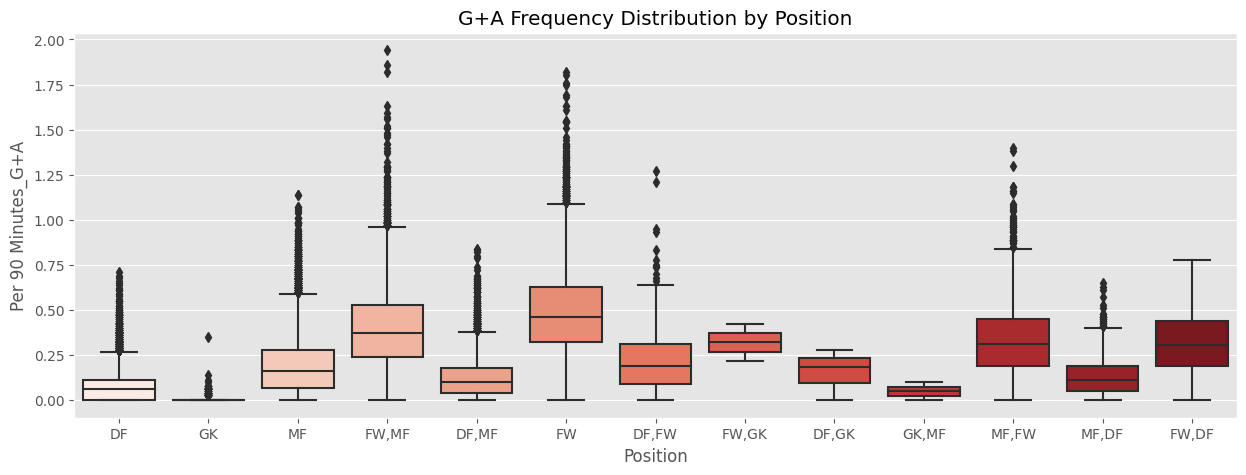

In [85]:
plt.figure(figsize=(15,5))
sns.boxplot(standard_stats.query('`Playing Time_90s`>7'),x='Unnamed: 2_level_0_Pos',y='Per 90 Minutes_G+A',palette='Reds')
plt.title('G+A Frequency Distribution by Position')
plt.xlabel('Position')
plt.show()

In [86]:
median_goals=standard_stats.query('`Playing Time_90s`>7')\
.groupby('Unnamed: 2_level_0_Pos')['Per 90 Minutes_G+A'].median().sort_values(ascending=False)
positions=median_goals.index[:4]

median_goals

# median scored goals by position

Unnamed: 2_level_0_Pos
FW       0.460
FW,MF    0.370
FW,GK    0.320
MF,FW    0.310
FW,DF    0.305
DF,FW    0.190
DF,GK    0.185
MF       0.160
MF,DF    0.110
DF,MF    0.100
DF       0.060
GK,MF    0.050
GK       0.000
Name: Per 90 Minutes_G+A, dtype: float64

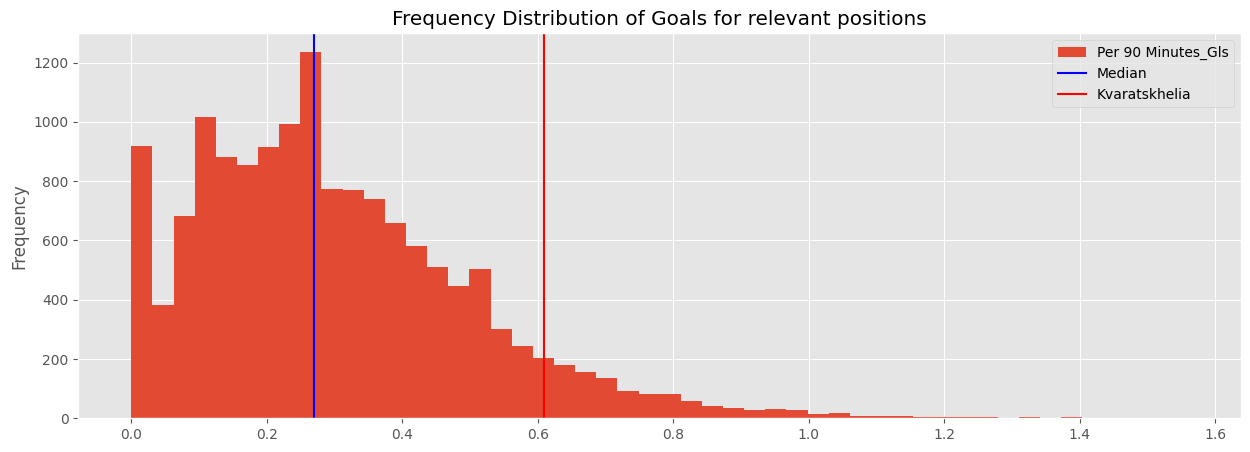

In [87]:
ax=standard_stats.query('`Unnamed: 2_level_0_Pos`.isin(@positions) and `Playing Time_Min`>630')\
['Per 90 Minutes_Gls'].plot(kind='hist',bins=50,figsize=(15,5))
ax.set_title('Frequency Distribution of Goals for relevant positions')

ax.axvline(standard_stats.query('`Unnamed: 2_level_0_Pos`.isin(@positions) and `Playing Time_Min`>630')['Per 90 Minutes_Gls'].median(),color='b',label='Median')
kvara=standard_stats[standard_stats['Unnamed: 0_level_0_Player']=='Khvicha Kvaratskhelia']['Per 90 Minutes_Gls'].iloc[0]
ax.axvline(kvara,color='red',label='Kvaratskhelia')

plt.legend()
plt.show()

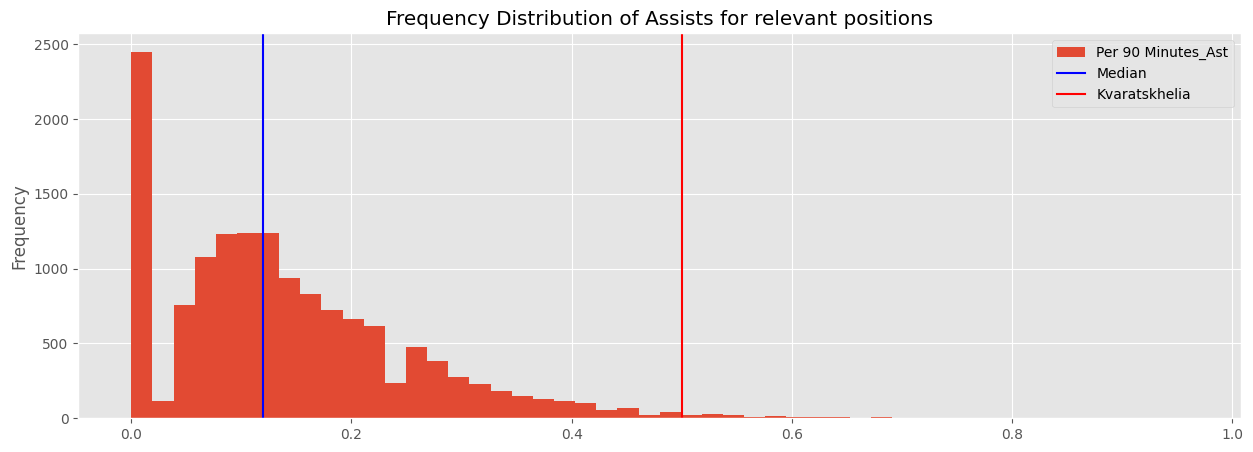

In [88]:
ax=standard_stats.query('`Unnamed: 2_level_0_Pos`.isin(@positions) and `Playing Time_Min`>630')\
['Per 90 Minutes_Ast'].plot(kind='hist',bins=50,figsize=(15,5))
ax.set_title('Frequency Distribution of Assists for relevant positions')

ax.axvline(standard_stats.query('`Unnamed: 2_level_0_Pos`.isin(@positions) and `Playing Time_Min`>630')['Per 90 Minutes_Ast'].median(),color='b',label='Median')
kvara=standard_stats[standard_stats['Unnamed: 0_level_0_Player']=='Khvicha Kvaratskhelia']['Per 90 Minutes_Ast'].iloc[0]
ax.axvline(kvara,color='red',label='Kvaratskhelia')

plt.legend()
plt.show()

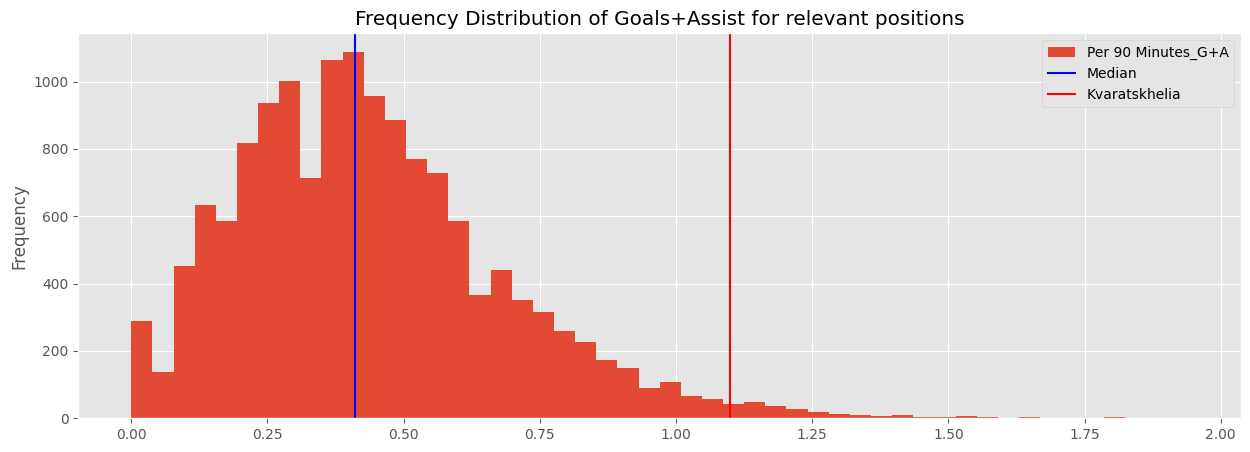

In [89]:
ax=standard_stats.query('`Unnamed: 2_level_0_Pos`.isin(@positions) and `Playing Time_Min`>630')\
['Per 90 Minutes_G+A'].plot(kind='hist',bins=50,figsize=(15,5))
ax.set_title('Frequency Distribution of Goals+Assist for relevant positions')

ax.axvline(standard_stats.query('`Unnamed: 2_level_0_Pos`.isin(@positions) and `Playing Time_Min`>630')['Per 90 Minutes_G+A'].median(),color='b',label='Median')
kvara=standard_stats[standard_stats['Unnamed: 0_level_0_Player']=='Khvicha Kvaratskhelia']['Per 90 Minutes_G+A'].iloc[0]
ax.axvline(kvara,color='red',label='Kvaratskhelia')

plt.legend()
plt.show()

In [90]:
standard_stats.query('`Unnamed: 2_level_0_Pos`.isin(@positions) and `Playing Time_Min`>630')['Per 90 Minutes_G+A'].quantile(0.985)
# Goal + Assist per 90 minutes
print(f'90 Minutes_G+A score of Kvara is {kvara} (Top 1.5%)')

90 Minutes_G+A score of Kvara is 1.1 (Top 1.5%)


In [91]:
standard_stats.query('`Playing Time_Min`>630 and `Per 90 Minutes_G+A`>@kvara and Season=="2022-2023"')\
[['League','Team','Unnamed: 0_level_0_Player','Playing Time_Min','Per 90 Minutes_G+A']]\
.sort_values('Per 90 Minutes_G+A',ascending=False).reset_index(drop=True)\
#.style.background_gradient(subset=['Per 90 Minutes_G+A'],cmap='Reds')

# players that have higher goal+assist per 90 minutes score in 2022-2023 season, given that the player played at least 630 minutes (7 matches)

,League,Team,Unnamed: 0_level_0_Player,Playing Time_Min,Per 90 Minutes_G+A
0,EreDivisie,PSV Eindhoven,Cody Gakpo,1122.0,1.68
1,EPL,Manchester City,Erling Haaland,2112.0,1.41
2,Ligue1,Paris S-G,Neymar,1545.0,1.40
3,Ligue1,Monaco,Wissam Ben Yedder,1392.0,1.29
4,Ligue1,Paris S-G,Lionel Messi,1937.0,1.21
5,SeriaA,Napoli,Victor Osimhen,1832.0,1.13
6,PrimeiraLiga,Porto,Evanilson,881.0,1.12


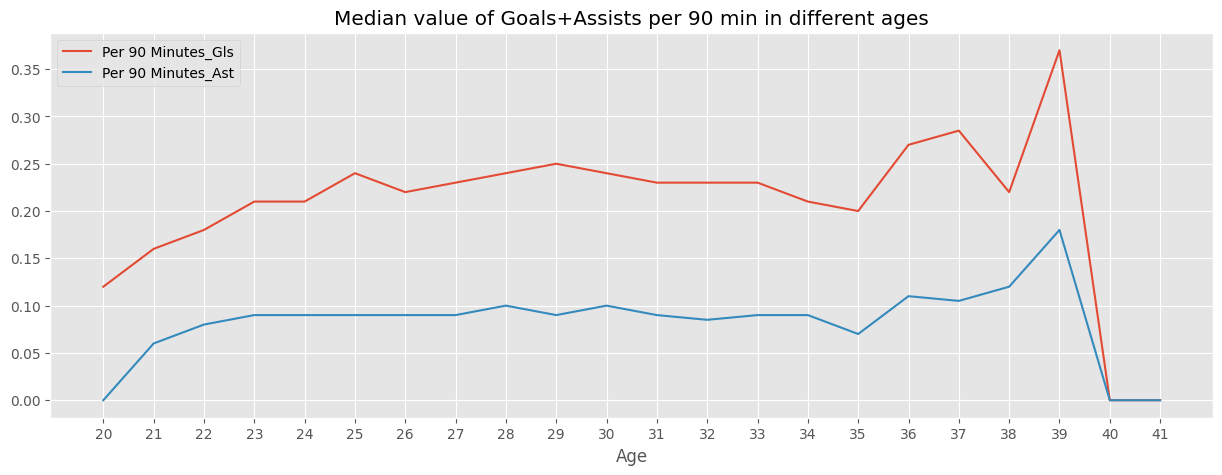

In [92]:
grouped=standard_stats.query('`Unnamed: 2_level_0_Pos`.isin(@positions)')\
.groupby('Unnamed: 3_level_0_Age')[['Playing Time_90s','Per 90 Minutes_Gls','Per 90 Minutes_Ast','Per 90 Minutes_G+A']].median().reset_index()
grouped=grouped[grouped['Unnamed: 3_level_0_Age']>=20]

fig,ax=plt.subplots(figsize=(15,5))
grouped.plot(ax=ax,x='Unnamed: 3_level_0_Age',y=grouped.columns[-3:-1])
ax.set_title('Median value of Goals+Assists per 90 min in different ages')
ax.legend(loc='upper left')
ax.set_xlabel('Age')
ax.set_xticks(grouped['Unnamed: 3_level_0_Age'],grouped['Unnamed: 3_level_0_Age'].astype(int))
#ax2=ax.twinx()
#grouped.plot(ax=ax2,x='Unnamed: 3_level_0_Age',y='Playing Time_90s',color='black')
plt.show()

PEARSON CORRELATION COEFFICIENT BETWEEN Percentage of Time_Start AND Per 90 Minutes_G+A: 0.21525380052438112


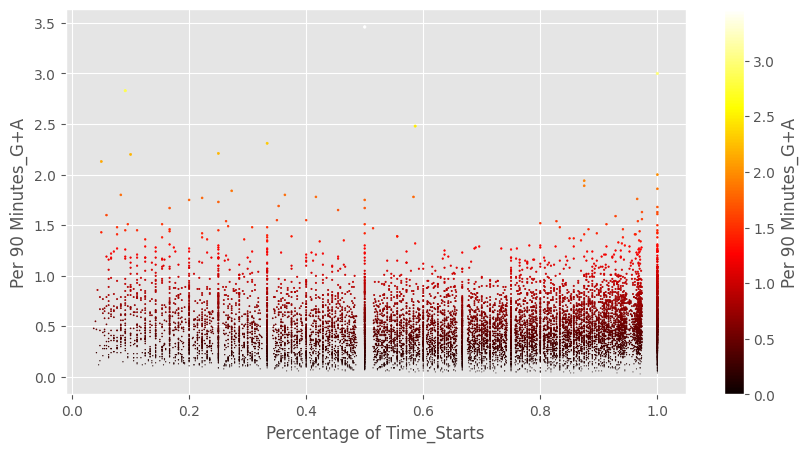

In [93]:
standard_stats['Percentage of Time_Starts']=standard_stats['Playing Time_Starts']/standard_stats['Unnamed: 4_level_0_MP']
filt=standard_stats.query('`Percentage of Time_Starts`.notna() and `Percentage of Time_Starts`>0 and `Unnamed: 2_level_0_Pos`.isin(@positions)')

filt.plot(kind='scatter',x='Percentage of Time_Starts',y='Per 90 Minutes_G+A',s='Per 90 Minutes_G+A',c='Per 90 Minutes_G+A',cmap='hot',figsize=(10,5))

correl=filt['Percentage of Time_Starts'].corr(filt['Per 90 Minutes_G+A'])
print(f'PEARSON CORRELATION COEFFICIENT BETWEEN Percentage of Time_Start AND Per 90 Minutes_G+A: {correl}')

standard_stats.drop(columns='Percentage of Time_Starts',inplace=True)

In [94]:
# when footballer is not in starting eleven in more than 80% of the matches,then he is more productive, than
# the players that are in starting eleven in 30-70 percent of the matches. Low percentage causes high productivity
# players that are in starting eleven in 80-100 percent of matches, are most productive. In this case high productivity causes high percentage.

# ANALISING GOALKEEPING  

In [95]:
goalkeeping

,Season,League,Team,Unnamed: 0_level_0_Player,Unnamed: 1_level_0_Nation,Unnamed: 2_level_0_Pos,Unnamed: 3_level_0_Age,Playing Time_MP,Playing Time_Starts,Playing Time_Min,Playing Time_90s,Performance_GA,Performance_GA90,Performance_SoTA,Performance_Saves,Performance_Save%,Performance_W,Performance_D,Performance_L,Performance_CS,Performance_CS%,Penalty Kicks_PKatt,Penalty Kicks_PKA,Penalty Kicks_PKsv,Penalty Kicks_PKm,Penalty Kicks_Save%,Unnamed: 23_level_0_Matches
0,2000-2001,EPL,Manchester Utd,Fabien Barthez,fr FRA,GK,29.0,30.0,30.0,2675.0,29.7,18.0,0.61,98.0,80.0,81.6,21.0,5.0,4.0,14.0,46.7,NaN,NaN,NaN,NaN,NaN,Matches
1,2000-2001,EPL,Manchester Utd,Raimond van der Gouw,nl NED,GK,37.0,10.0,5.0,531.0,5.9,11.0,1.86,33.0,22.0,66.7,4.0,3.0,1.0,1.0,20.0,NaN,NaN,NaN,NaN,NaN,Matches
2,2000-2001,EPL,Manchester Utd,Andy Goram,sct SCO,GK,36.0,2.0,2.0,124.0,1.4,2.0,1.45,7.0,5.0,71.4,1.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,Matches
3,2000-2001,EPL,Manchester Utd,Paul Rachubka,eng ENG,GK,19.0,1.0,1.0,90.0,1.0,0.0,0.00,2.0,2.0,100.0,1.0,0.0,0.0,1.0,100.0,NaN,NaN,NaN,NaN,NaN,Matches
6,2000-2001,EPL,Arsenal,David Seaman,eng ENG,GK,36.0,24.0,24.0,2160.0,24.0,23.0,0.96,79.0,56.0,70.9,15.0,5.0,4.0,11.0,45.8,NaN,NaN,NaN,NaN,NaN,Matches
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12659,2022-2023,PrimeiraLiga,Paços,Jordi Almeida,br BRA,GK,29-191,6.0,6.0,540.0,6.0,14.0,2.33,35.0,23.0,60.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,Matches
12660,2022-2023,PrimeiraLiga,Paços,Igor Vekič,si SVN,GK,24-311,6.0,6.0,540.0,6.0,9.0,1.50,18.0,9.0,50.0,0.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,Matches
12661,2022-2023,PrimeiraLiga,Paços,José Oliveira,pt POR,GK,20-341,2.0,2.0,180.0,2.0,6.0,3.00,13.0,7.0,61.5,0.0,0.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,Matches
12664,2022-2023,PrimeiraLiga,Santa Clara,Gabriel Batista,br BRA,GK,24-283,16.0,16.0,1440.0,16.0,27.0,1.69,80.0,56.0,68.8,2.0,4.0,10.0,3.0,18.8,3.0,2.0,0.0,1.0,0.0,Matches


In [96]:
goalkeeping['Unnamed: 3_level_0_Age']=goalkeeping['Unnamed: 3_level_0_Age'].astype(str).apply(lambda x:float(x) if '-' not in x else float(x.split('-')[0]))

In [97]:
#top 20 goalkeepers' seasons with the lowest GA90

top_goalkeepers=goalkeeping.query('`Playing Time_Min`>1800').sort_values('Performance_GA90').head(20)\
[['Season','League','Team','Unnamed: 0_level_0_Player','Playing Time_90s','Performance_GA90']]
tops=top_goalkeepers['Unnamed: 0_level_0_Player'].unique()
top_goalkeepers

,Season,League,Team,Unnamed: 0_level_0_Player,Playing Time_90s,Performance_GA90
12293,2022-2023,LaLiga,Barcelona,Marc-André ter Stegen,25.0,0.32
5970,2010-2011,PrimeiraLiga,Porto,Helton Arruda,24.9,0.32
2153,2004-2005,EPL,Chelsea,Petr Čech,35.0,0.37
8162,2014-2015,PrimeiraLiga,Benfica,Júlio César,22.9,0.39
8166,2014-2015,PrimeiraLiga,Porto,Fabiano,26.1,0.42
1938,2003-2004,SeriaA,Roma,Ivan Pelizzoli,31.0,0.45
6348,2011-2012,SeriaA,Juventus,Gianluigi Buffon,35.0,0.46
4867,2008-2009,PrimeiraLiga,Porto,Helton Arruda,26.0,0.46
7071,2012-2013,PrimeiraLiga,Porto,Helton Arruda,29.8,0.47
8404,2015-2016,LaLiga,Atlético Madrid,Jan Oblak,38.0,0.47


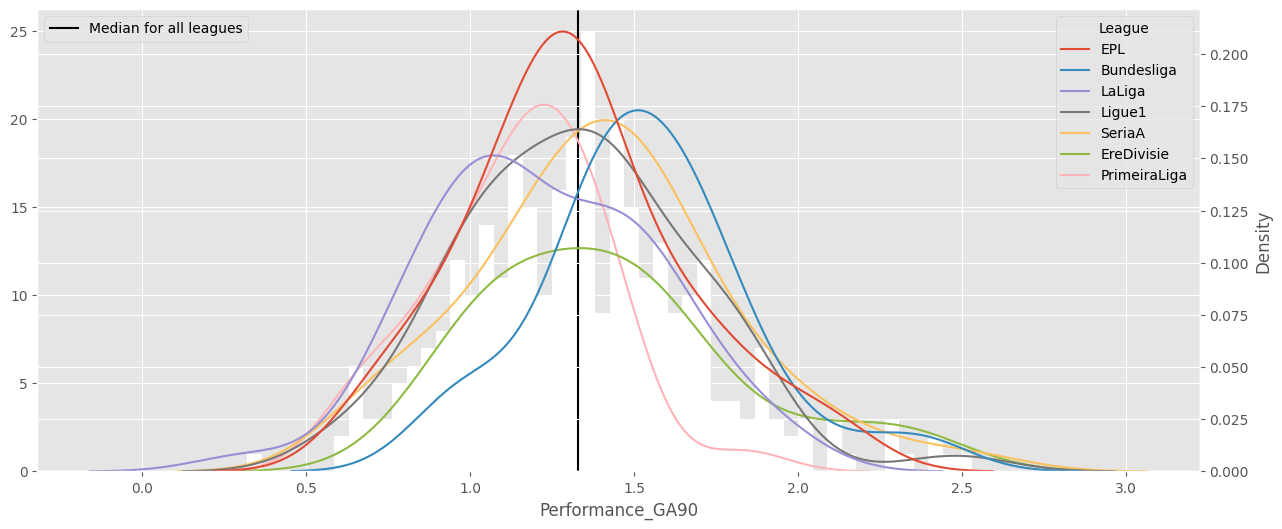

In [98]:
fig,ax1=plt.subplots(1,1,figsize=(15,6))

goalkeeping.query('`Playing Time_Min`>1800 and Performance_SoTA>50 and Season>="2020"')['Performance_GA90'].hist(bins=50,ec=None,color='white',alpha=1,ax=ax1)
median=goalkeeping.query('`Playing Time_Min`>1800 and Performance_SoTA>50 and Season>="2020"')['Performance_GA90'].median()
ax1.axvline(median,color='black',label='Median for all leagues')
ax1.set_xlabel('Performance_GA90')
ax1.legend(loc='upper left')
sns.kdeplot(goalkeeping.query('`Playing Time_Min`>1800 and Performance_SoTA>50 and Season>="2020"'),x='Performance_GA90',hue='League',ax=ax1.twinx())

plt.show()

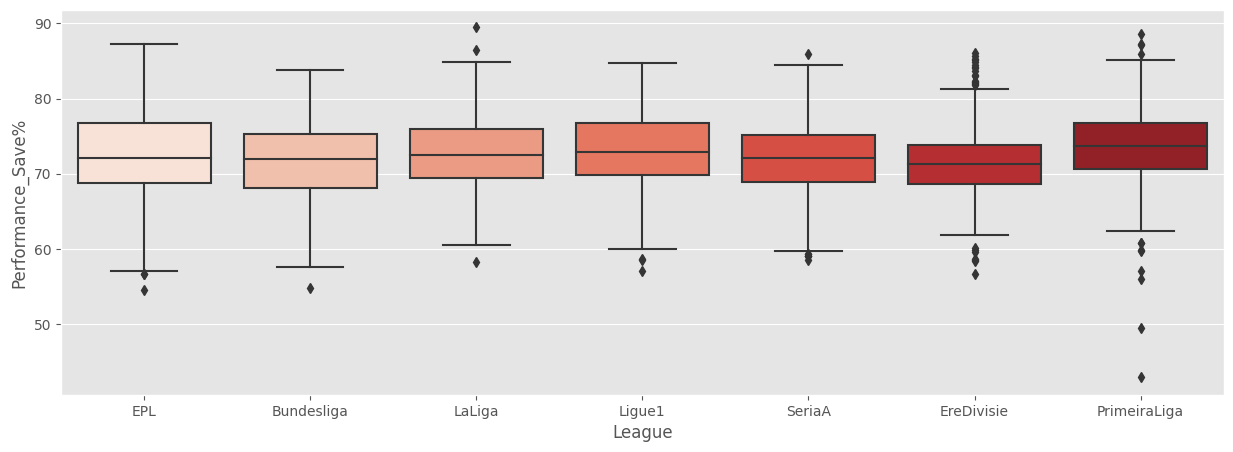

In [99]:
plt.figure(figsize=(15,5))
sns.boxplot(goalkeeping.query('`Playing Time_Min`>1800'),x='League',y='Performance_Save%',palette='Reds')
plt.show()

# ANALIZING SHOOTING 

In [100]:
shooting

,Season,League,Team,Unnamed: 0_level_0_Player,Unnamed: 1_level_0_Nation,Unnamed: 2_level_0_Pos,Unnamed: 3_level_0_Age,Unnamed: 4_level_0_90s,Standard_Gls,Standard_Sh,Standard_SoT,Standard_SoT%,Standard_Sh/90,Standard_SoT/90,Standard_G/Sh,Standard_G/SoT,Standard_Dist,Standard_PK,Standard_PKatt,Unnamed: 16_level_0_Matches,Standard_FK,Expected_xG,Expected_npxG,Expected_npxG/Sh,Expected_G-xG,Expected_np:G-xG,Unnamed: 22_level_0_Matches
0,2000-2001,EPL,Manchester Utd,Gary Neville,eng ENG,DF,25.0,31.7,1.0,NaN,5.0,NaN,NaN,0.16,NaN,0.20,NaN,0.0,0.0,Matches,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000-2001,EPL,Manchester Utd,Fabien Barthez,fr FRA,GK,29.0,29.7,0.0,NaN,0.0,NaN,NaN,0.00,NaN,NaN,NaN,0.0,0.0,Matches,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000-2001,EPL,Manchester Utd,David Beckham,eng ENG,MF,25.0,29.4,9.0,NaN,34.0,NaN,NaN,1.16,NaN,0.24,NaN,1.0,1.0,Matches,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000-2001,EPL,Manchester Utd,Paul Scholes,eng ENG,MF,25.0,27.2,6.0,NaN,18.0,NaN,NaN,0.66,NaN,0.33,NaN,0.0,1.0,Matches,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000-2001,EPL,Manchester Utd,Roy Keane,ie IRL,MF,28.0,26.4,2.0,NaN,15.0,NaN,NaN,0.57,NaN,0.13,NaN,0.0,0.0,Matches,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90234,2022-2023,PrimeiraLiga,Santa Clara,Andrezinho,pt POR,"DF,MF",26-102,1.6,0.0,1.0,0.0,0.0,0.61,0.00,0.0,NaN,8.2,0.0,0.0,NaN,0.0,0.1,0.1,0.09,-0.1,-0.1,Matches
90235,2022-2023,PrimeiraLiga,Santa Clara,Filip Stevanovic,rs SRB,"FW,MF",20-169,1.5,0.0,3.0,1.0,33.3,1.99,0.66,0.0,0.00,17.5,0.0,0.0,NaN,1.0,0.2,0.2,0.08,-0.2,-0.2,Matches
90236,2022-2023,PrimeiraLiga,Santa Clara,Rodrigo Valente,pt POR,"MF,FW",22-026,1.1,0.0,3.0,0.0,0.0,2.84,0.00,0.0,NaN,16.5,0.0,0.0,NaN,0.0,0.3,0.3,0.11,-0.3,-0.3,Matches
90237,2022-2023,PrimeiraLiga,Santa Clara,Rui Costa,pt POR,MF,27-021,0.5,0.0,0.0,0.0,NaN,0.00,0.00,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,0.0,NaN,0.0,0.0,Matches


In [101]:
shooting['Chance_Realization']=shooting['Standard_Gls']/shooting['Standard_Sh']

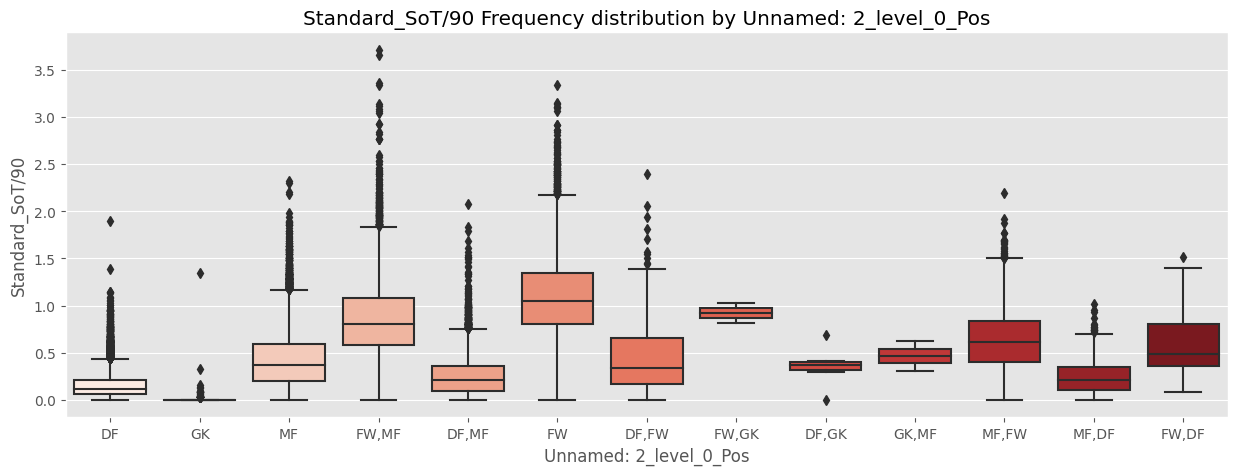

In [102]:
filt=shooting.query('`Unnamed: 4_level_0_90s`>7')

plt.figure(figsize=(15,5))
sns.boxplot(filt,x='Unnamed: 2_level_0_Pos',y='Standard_SoT/90',palette='Reds')
plt.title('Standard_SoT/90 Frequency distribution by Unnamed: 2_level_0_Pos')
plt.show()

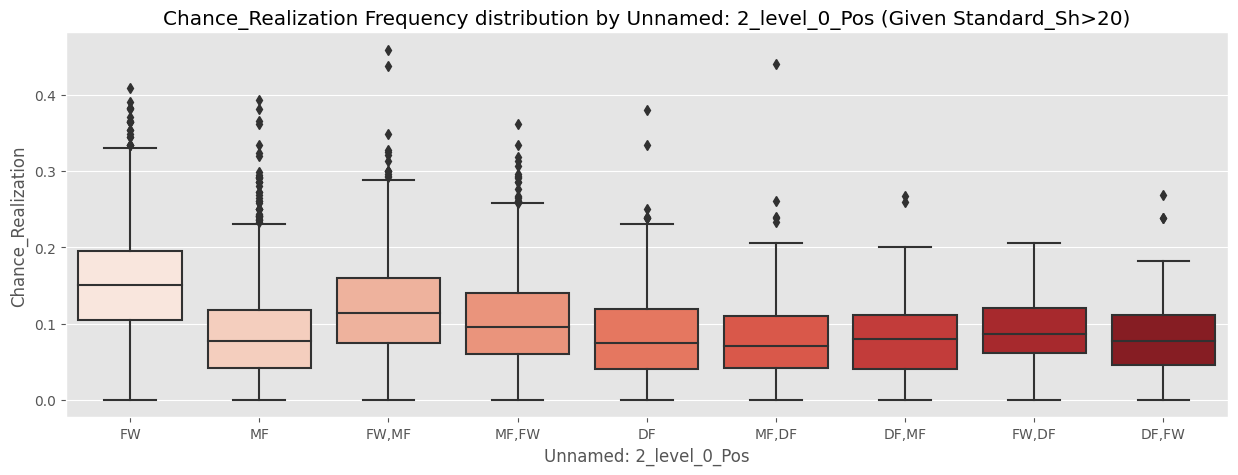

In [103]:
filt=shooting.query('`Unnamed: 4_level_0_90s`>7')

plt.figure(figsize=(15,5))
sns.boxplot(filt.query('Standard_Sh>20'),x='Unnamed: 2_level_0_Pos',y='Chance_Realization',palette='Reds')
plt.title('Chance_Realization Frequency distribution by Unnamed: 2_level_0_Pos (Given Standard_Sh>20)')
plt.show()

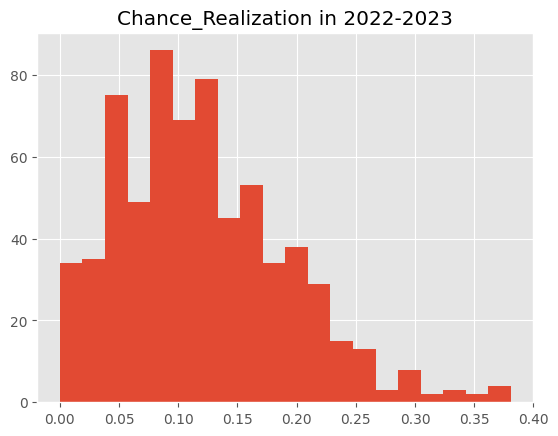

In [104]:
ax=filt.query('Standard_Sh>20 and Season=="2022-2023"')['Chance_Realization'].hist(bins=20)
ax.set_title('Chance_Realization in 2022-2023')
plt.show()

In [105]:
filt.query('Standard_Sh>20 and Season=="2022-2023"').sort_values('Chance_Realization',ascending=False).head(10)

#Footballers with highest chance realization score in 2022-2023 season

,Season,League,Team,Unnamed: 0_level_0_Player,Unnamed: 1_level_0_Nation,Unnamed: 2_level_0_Pos,Unnamed: 3_level_0_Age,Unnamed: 4_level_0_90s,Standard_Gls,Standard_Sh,Standard_SoT,Standard_SoT%,Standard_Sh/90,Standard_SoT/90,Standard_G/Sh,Standard_G/SoT,Standard_Dist,Standard_PK,Standard_PKatt,Unnamed: 16_level_0_Matches,Standard_FK,Expected_xG,Expected_npxG,Expected_npxG/Sh,Expected_G-xG,Expected_np:G-xG,Unnamed: 22_level_0_Matches,Chance_Realization
88737,2022-2023,SeriaA,Bologna,Marko Arnautović,at AUT,FW,33-328,13.5,8.0,21.0,10.0,47.6,1.56,0.74,0.24,0.50,15.7,3.0,3.0,NaN,0.0,5.7,3.3,0.16,2.3,1.7,Matches,0.380952
86754,2022-2023,Bundesliga,Bayern Munich,Eric Maxim Choupo-Moting,cm CMR,FW,33-355,11.4,10.0,27.0,13.0,48.1,2.37,1.14,0.37,0.77,12.5,0.0,1.0,NaN,0.0,5.5,4.7,0.17,4.5,5.3,Matches,0.370370
88133,2022-2023,Ligue1,Lorient,Terem Moffi,ng NGA,FW,23-292,15.4,12.0,33.0,18.0,54.5,2.14,1.17,0.33,0.61,13.6,1.0,2.0,NaN,0.0,7.3,5.7,0.17,4.7,5.3,Matches,0.363636
87976,2022-2023,Ligue1,Monaco,Wissam Ben Yedder,fr FRA,FW,32-213,15.5,16.0,44.0,25.0,56.8,2.84,1.62,0.27,0.48,14.5,4.0,5.0,NaN,1.0,12.5,8.6,0.21,3.5,3.4,Matches,0.363636
87890,2022-2023,Ligue1,Paris S-G,Neymar,br BRA,"MF,FW",31-036,17.2,13.0,36.0,18.0,50.0,2.10,1.05,0.31,0.61,16.7,2.0,2.0,NaN,6.0,8.2,6.7,0.19,4.8,4.3,Matches,0.361111
86926,2022-2023,Bundesliga,Mainz 05,Marcus Ingvartsen,dk DEN,"FW,MF",27-068,9.8,8.0,23.0,7.0,30.4,2.35,0.72,0.17,0.57,16.8,4.0,4.0,NaN,0.0,5.7,2.5,0.11,2.3,1.5,Matches,0.347826
87977,2022-2023,Ligue1,Monaco,Breel Embolo,ch SUI,FW,26-027,18.5,12.0,36.0,17.0,47.2,1.94,0.92,0.33,0.71,11.0,0.0,1.0,NaN,0.0,8.1,7.2,0.20,3.9,4.8,Matches,0.333333
86187,2022-2023,EPL,Manchester City,Erling Haaland,no NOR,FW,22-235,23.5,28.0,86.0,40.0,46.5,3.66,1.70,0.27,0.58,12.2,5.0,5.0,NaN,0.0,18.9,15.7,0.20,8.1,7.3,Matches,0.325581
86867,2022-2023,Bundesliga,Freiburg,Vincenzo Grifo,it ITA,"FW,MF",29-340,17.9,12.0,37.0,14.0,37.8,2.07,0.78,0.16,0.43,22.6,6.0,7.0,NaN,10.0,7.8,2.2,0.06,4.2,3.8,Matches,0.324324
86893,2022-2023,Bundesliga,Eint Frankfurt,Daichi Kamada,jp JPN,"MF,FW",26-220,17.4,7.0,22.0,7.0,31.8,1.26,0.40,0.23,0.71,17.2,2.0,2.0,NaN,4.0,5.4,3.8,0.17,1.6,1.2,Matches,0.318182


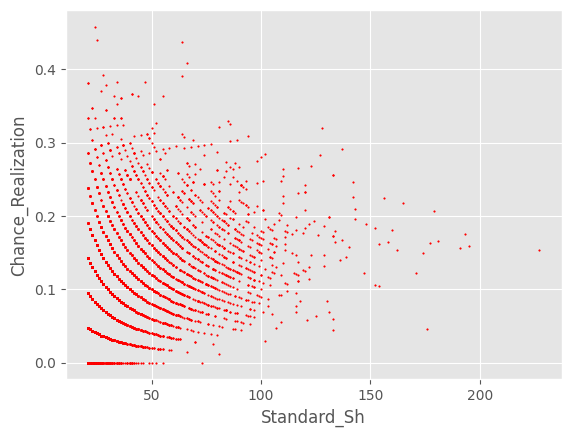

In [106]:
filt.query('Standard_Sh>20').plot(kind='scatter',x='Standard_Sh',y='Chance_Realization',s=1,c='red')
plt.show()

#Chance_Realization descreases as Standard_Sh increases

# ANALYZING PASSING

In [107]:
passing

,Season,League,Team,Unnamed: 0_level_0_Player,Unnamed: 1_level_0_Nation,Unnamed: 2_level_0_Pos,Unnamed: 3_level_0_Age,Unnamed: 4_level_0_90s,Total_Cmp,Total_Att,Total_Cmp%,Total_TotDist,Total_PrgDist,Short_Cmp,Short_Att,Short_Cmp%,Medium_Cmp,Medium_Att,Medium_Cmp%,Long_Cmp,Long_Att,Long_Cmp%,Unnamed: 19_level_0_Ast,Unnamed: 20_level_0_xAG,Unnamed: 21_level_0_xA,Unnamed: 22_level_0_A-xAG,Unnamed: 23_level_0_KP,Unnamed: 24_level_0_1/3,Unnamed: 25_level_0_PPA,Unnamed: 26_level_0_CrsPA,Unnamed: 27_level_0_PrgP,Unnamed: 28_level_0_Matches
0,2017-2018,EPL,Manchester City,Ederson,br BRA,GK,23.0,35.5,955.0,1098.0,87.0,23400.0,15983.0,200.0,201.0,99.5,530.0,536.0,98.9,224.0,357.0,62.7,0.0,0.1,0.0,-0.1,1.0,9.0,0.0,0.0,0.0,Matches
1,2017-2018,EPL,Manchester City,Kevin De Bruyne,be BEL,MF,26.0,34.1,2351.0,3008.0,78.2,39772.0,11181.0,1154.0,1322.0,87.3,885.0,1090.0,81.2,221.0,376.0,58.8,16.0,11.1,11.7,4.9,105.0,258.0,119.0,11.0,388.0,Matches
2,2017-2018,EPL,Manchester City,Nicolás Otamendi,ar ARG,DF,29.0,33.0,2829.0,3082.0,91.8,51762.0,16561.0,1081.0,1132.0,95.5,1459.0,1561.0,93.5,238.0,312.0,76.3,0.0,0.9,1.1,-0.9,12.0,226.0,5.0,0.0,212.0,Matches
3,2017-2018,EPL,Manchester City,Fernandinho,br BRA,MF,32.0,32.0,2686.0,2999.0,89.6,42640.0,13288.0,1335.0,1407.0,94.9,1083.0,1190.0,91.0,167.0,235.0,71.1,3.0,2.8,5.0,0.2,20.0,318.0,31.0,0.0,320.0,Matches
4,2017-2018,EPL,Manchester City,Kyle Walker,eng ENG,DF,27.0,30.9,2307.0,2682.0,86.0,37708.0,9574.0,1149.0,1250.0,91.9,932.0,1046.0,89.1,167.0,273.0,61.2,6.0,4.6,5.1,1.4,29.0,221.0,32.0,4.0,221.0,Matches
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23409,2022-2023,PrimeiraLiga,Santa Clara,Andrezinho,pt POR,"DF,MF",26-102,1.6,52.0,71.0,73.2,822.0,294.0,24.0,32.0,75.0,21.0,28.0,75.0,4.0,7.0,57.1,0.0,0.2,0.2,-0.2,3.0,5.0,2.0,1.0,5.0,Matches
23410,2022-2023,PrimeiraLiga,Santa Clara,Filip Stevanovic,rs SRB,"FW,MF",20-169,1.5,31.0,47.0,66.0,464.0,74.0,19.0,26.0,73.1,9.0,12.0,75.0,2.0,4.0,50.0,1.0,0.1,0.2,0.9,3.0,0.0,0.0,0.0,4.0,Matches
23411,2022-2023,PrimeiraLiga,Santa Clara,Rodrigo Valente,pt POR,"MF,FW",22-026,1.1,29.0,38.0,76.3,431.0,154.0,18.0,20.0,90.0,9.0,11.0,81.8,1.0,5.0,20.0,0.0,0.2,0.7,-0.2,2.0,3.0,1.0,0.0,4.0,Matches
23412,2022-2023,PrimeiraLiga,Santa Clara,Rui Costa,pt POR,MF,27-021,0.5,4.0,12.0,33.3,43.0,1.0,2.0,4.0,50.0,1.0,4.0,25.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Matches


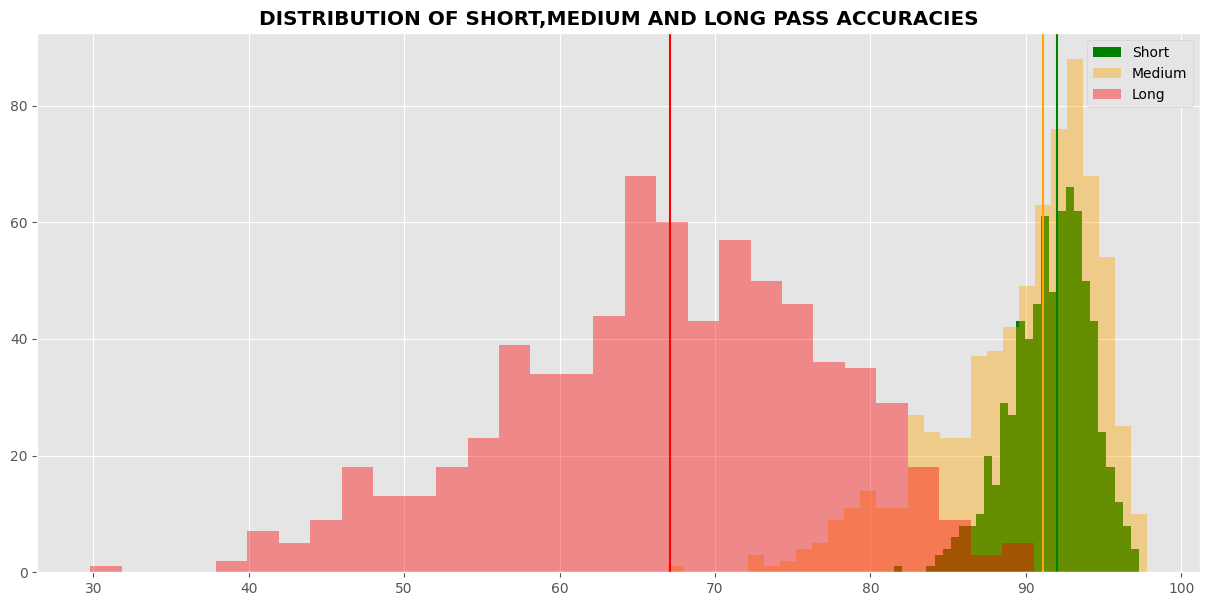

In [108]:
fig,ax=plt.subplots(figsize=(15,7))
passing.query('Total_Cmp>1500')['Short_Cmp%'].hist(bins=30,label='Short',color='g')
passing.query('Total_Cmp>1500')['Medium_Cmp%'].hist(bins=30,label='Medium',alpha=0.4,color='orange')
passing.query('Total_Cmp>1500')['Long_Cmp%'].hist(bins=30,label='Long',alpha=0.4,color='r')

plt.axvline(passing.query('Total_Cmp>1500')['Short_Cmp%'].median(),color='g')
plt.axvline(passing.query('Total_Cmp>1500')['Medium_Cmp%'].median(),color='orange')
plt.axvline(passing.query('Total_Cmp>1500')['Long_Cmp%'].median(),color='r')

plt.title('DISTRIBUTION OF SHORT,MEDIUM AND LONG PASS ACCURACIES',fontweight='bold')
plt.legend()
fig.show()


#long pass accuracy varies greatly. Medium pass accuracy distribution range is bigger than Short pass accuracy range.

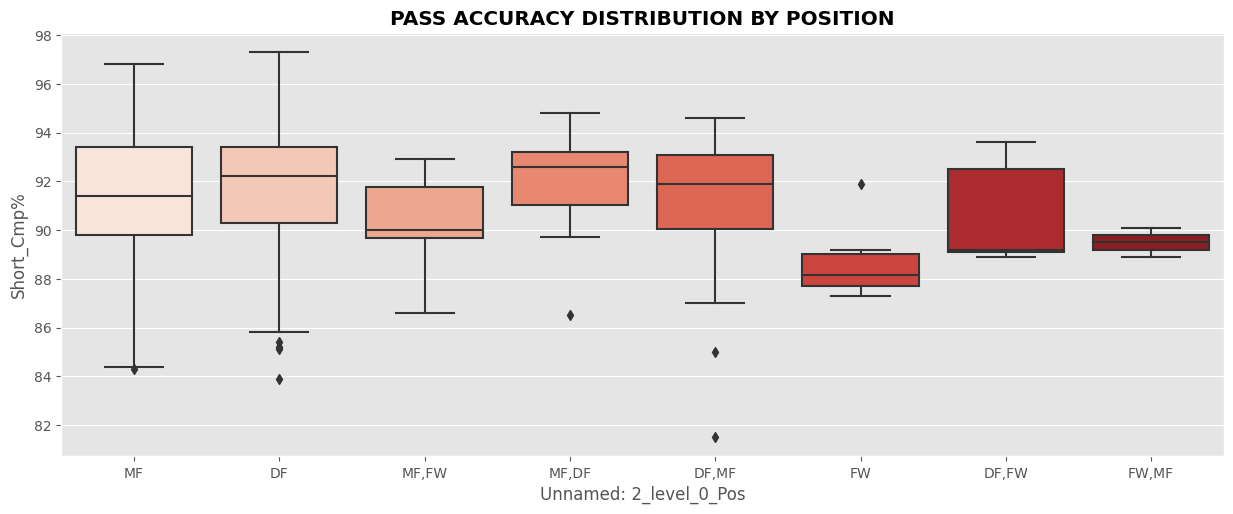

In [109]:
plt.figure(figsize=(15,5.5))
sns.boxplot(data=passing.query('Total_Cmp>1500'),
            x='Unnamed: 2_level_0_Pos',y=['Short_Cmp%','Medium_Cmp%','Long_Cmp%'][0],palette='Reds')
plt.title('PASS ACCURACY DISTRIBUTION BY POSITION',fontweight='bold')
plt.show()

In [110]:
passing.query('Total_Cmp>1500 and Season=="2021-2022"').sort_values('Total_Cmp%',ascending=False)\
[['Team','Unnamed: 0_level_0_Player','Total_Cmp%']]

#players with the highest passing accuracy

,Team,Unnamed: 0_level_0_Player,Total_Cmp%
16834,Paris S-G,Presnel Kimpembe,95.6
15034,Manchester City,Aymeric Laporte,94.6
15035,Manchester City,Rúben Dias,93.3
16833,Paris S-G,Marquinhos,93.1
16870,Marseille,William Saliba,93.0
...,...,...,...
16505,Celta Vigo,Javi Galán,77.8
15436,Southampton,James Ward-Prowse,77.5
15172,Manchester Utd,Bruno Fernandes,74.0
15060,Liverpool,Trent Alexander-Arnold,74.0


# ANALYZING goal_and_shot_creation 

In [111]:
goal_and_shot_creation

,Season,League,Team,Unnamed: 0_level_0_Player,Unnamed: 1_level_0_Nation,Unnamed: 2_level_0_Pos,Unnamed: 3_level_0_Age,Unnamed: 4_level_0_90s,SCA_SCA,SCA_SCA90,SCA Types_PassLive,SCA Types_PassDead,SCA Types_TO,SCA Types_Sh,SCA Types_Fld,SCA Types_Def,GCA_GCA,GCA_GCA90,GCA Types_PassLive,GCA Types_PassDead,GCA Types_TO,GCA Types_Sh,GCA Types_Fld,GCA Types_Def,Unnamed: 21_level_0_Matches
0,2017-2018,EPL,Manchester City,Ederson,br BRA,GK,23.0,35.5,3.0,0.08,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,Matches
1,2017-2018,EPL,Manchester City,Kevin De Bruyne,be BEL,MF,26.0,34.1,215.0,6.30,152.0,43.0,8.0,6.0,5.0,1.0,34.0,1.00,30.0,2.0,1.0,1.0,0.0,0.0,Matches
2,2017-2018,EPL,Manchester City,Nicolás Otamendi,ar ARG,DF,29.0,33.0,36.0,1.09,32.0,0.0,0.0,4.0,0.0,0.0,1.0,0.03,1.0,0.0,0.0,0.0,0.0,0.0,Matches
3,2017-2018,EPL,Manchester City,Fernandinho,br BRA,MF,32.0,32.0,74.0,2.31,63.0,0.0,2.0,3.0,3.0,3.0,13.0,0.41,13.0,0.0,0.0,0.0,0.0,0.0,Matches
4,2017-2018,EPL,Manchester City,Kyle Walker,eng ENG,DF,27.0,30.9,58.0,1.87,53.0,2.0,1.0,0.0,2.0,0.0,7.0,0.23,7.0,0.0,0.0,0.0,0.0,0.0,Matches
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23409,2022-2023,PrimeiraLiga,Santa Clara,Andrezinho,pt POR,"DF,MF",26-102,1.6,6.0,3.67,3.0,1.0,1.0,0.0,0.0,1.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,Matches
23410,2022-2023,PrimeiraLiga,Santa Clara,Filip Stevanovic,rs SRB,"FW,MF",20-169,1.5,4.0,2.67,4.0,0.0,0.0,0.0,0.0,0.0,1.0,0.67,1.0,0.0,0.0,0.0,0.0,0.0,Matches
23411,2022-2023,PrimeiraLiga,Santa Clara,Rodrigo Valente,pt POR,"MF,FW",22-026,1.1,4.0,3.79,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,Matches
23412,2022-2023,PrimeiraLiga,Santa Clara,Rui Costa,pt POR,MF,27-021,0.5,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,Matches


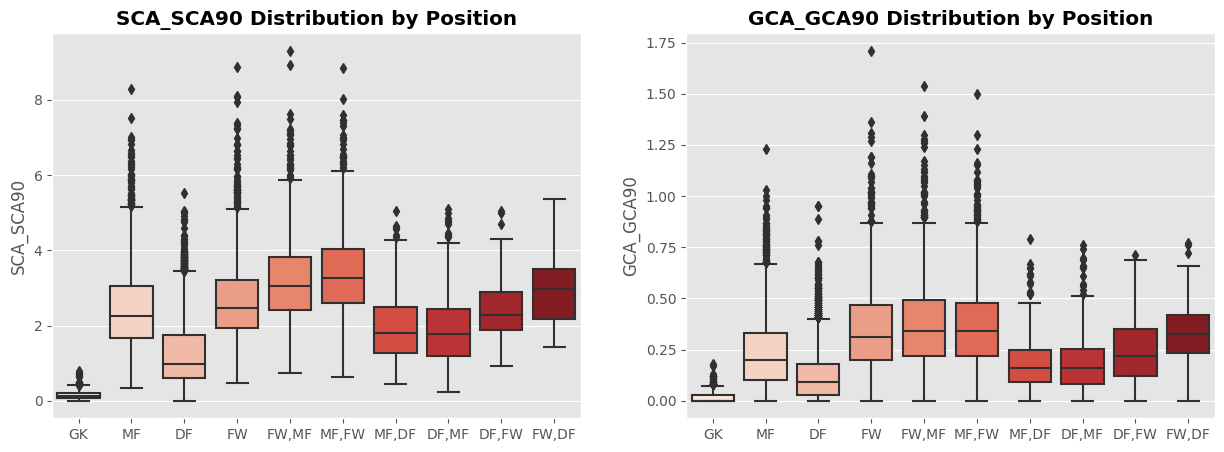

In [112]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5))

sns.boxplot(goal_and_shot_creation.query('`Unnamed: 4_level_0_90s`>8'),x='Unnamed: 2_level_0_Pos',y='SCA_SCA90',palette='Reds',ax=ax1)
sns.boxplot(goal_and_shot_creation.query('`Unnamed: 4_level_0_90s`>8'),x='Unnamed: 2_level_0_Pos',y='GCA_GCA90',palette='Reds',ax=ax2)
ax1.set_title('SCA_SCA90 Distribution by Position',fontweight='bold')
ax2.set_title('GCA_GCA90 Distribution by Position',fontweight='bold')
ax1.set_xlabel('')
ax2.set_xlabel('')
plt.show()

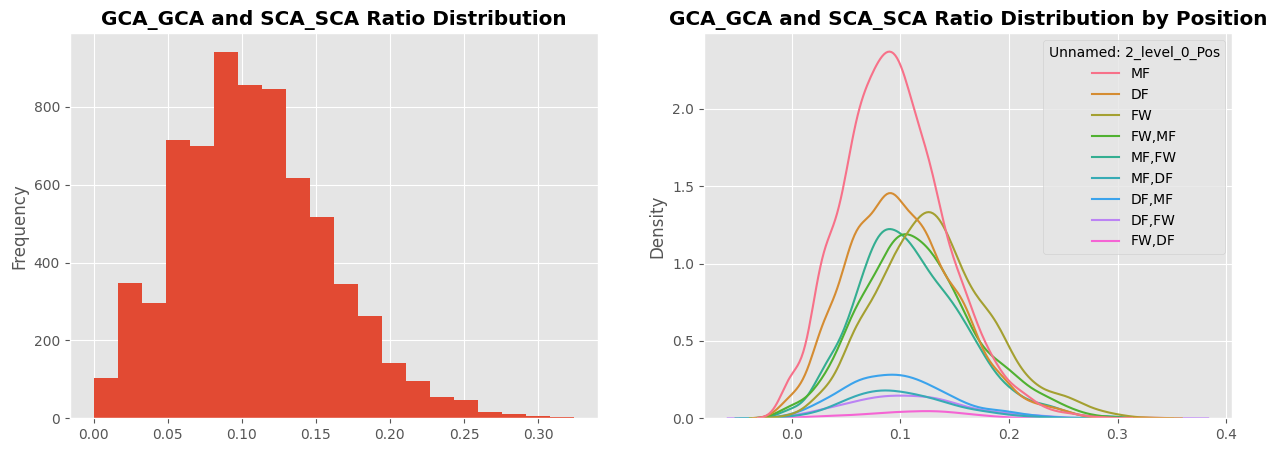

In [113]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5))
(goal_and_shot_creation.query('SCA_SCA>30')['GCA_GCA']/goal_and_shot_creation.query('SCA_SCA>30')['SCA_SCA']).plot(kind='hist',bins=20,density=False,ax=ax1)
sns.kdeplot(goal_and_shot_creation.query('SCA_SCA>30'),
           x=goal_and_shot_creation.query('SCA_SCA>30')['GCA_GCA']/goal_and_shot_creation.query('SCA_SCA>30')['SCA_SCA'],
           hue=goal_and_shot_creation.query('SCA_SCA>30')['Unnamed: 2_level_0_Pos'],ax=ax2)
ax1.set_title('GCA_GCA and SCA_SCA Ratio Distribution',fontweight='bold')
ax2.set_title('GCA_GCA and SCA_SCA Ratio Distribution by Position',fontweight='bold')
plt.show()

# FW has better ratio of Goal Creation vs Shot Creation

# ANALYZING defensive_actions 

In [114]:
defensive_actions['Blocks_Blocks%']=defensive_actions['Blocks_Blocks']/defensive_actions['Unnamed: 4_level_0_90s']
defensive_actions['Blocks_Sh%']=defensive_actions['Blocks_Sh']/defensive_actions['Unnamed: 4_level_0_90s']
defensive_actions['Blocks_Pass%']=defensive_actions['Blocks_Pass']/defensive_actions['Unnamed: 4_level_0_90s']
defensive_actions['Unnamed: 17_level_0_Int%']=defensive_actions['Unnamed: 17_level_0_Int']/defensive_actions['Unnamed: 4_level_0_90s']
defensive_actions['Unnamed: 18_level_0_Tkl+Int%']=defensive_actions['Unnamed: 18_level_0_Tkl+Int']/defensive_actions['Unnamed: 4_level_0_90s']
defensive_actions['Unnamed: 19_level_0_Clr%']=defensive_actions['Unnamed: 19_level_0_Clr']/defensive_actions['Unnamed: 4_level_0_90s']
defensive_actions['Unnamed: 20_level_0_Err%']=defensive_actions['Unnamed: 20_level_0_Err']/defensive_actions['Unnamed: 4_level_0_90s']

In [115]:
defensive_actions

,Season,League,Team,Unnamed: 0_level_0_Player,Unnamed: 1_level_0_Nation,Unnamed: 2_level_0_Pos,Unnamed: 3_level_0_Age,Unnamed: 4_level_0_90s,Tackles_Tkl,Tackles_TklW,Tackles_Def 3rd,Tackles_Mid 3rd,Tackles_Att 3rd,Challenges_Tkl,Challenges_Att,Challenges_Tkl%,Challenges_Lost,Blocks_Blocks,Blocks_Sh,Blocks_Pass,Unnamed: 17_level_0_Int,Unnamed: 18_level_0_Tkl+Int,Unnamed: 19_level_0_Clr,Unnamed: 20_level_0_Err,Unnamed: 21_level_0_Matches,Blocks_Blocks%,Blocks_Sh%,Blocks_Pass%,Unnamed: 17_level_0_Int%,Unnamed: 18_level_0_Tkl+Int%,Unnamed: 19_level_0_Clr%,Unnamed: 20_level_0_Err%
0,2017-2018,EPL,Manchester City,Ederson,br BRA,GK,23.0,35.5,1.0,1.0,1.0,0.0,0.0,0.0,0.0,NaN,0.0,1.0,0.0,1.0,0.0,1.0,15.0,6.0,Matches,0.028169,0.000000,0.028169,0.000000,0.028169,0.422535,0.169014
1,2017-2018,EPL,Manchester City,Kevin De Bruyne,be BEL,MF,26.0,34.1,62.0,43.0,23.0,25.0,14.0,23.0,80.0,28.8,57.0,45.0,2.0,43.0,25.0,87.0,14.0,2.0,Matches,1.319648,0.058651,1.260997,0.733138,2.551320,0.410557,0.058651
2,2017-2018,EPL,Manchester City,Nicolás Otamendi,ar ARG,DF,29.0,33.0,58.0,43.0,35.0,22.0,1.0,19.0,44.0,43.2,25.0,21.0,10.0,11.0,48.0,106.0,129.0,3.0,Matches,0.636364,0.303030,0.333333,1.454545,3.212121,3.909091,0.090909
3,2017-2018,EPL,Manchester City,Fernandinho,br BRA,MF,32.0,32.0,62.0,35.0,22.0,28.0,12.0,24.0,65.0,36.9,41.0,38.0,6.0,32.0,47.0,109.0,68.0,2.0,Matches,1.187500,0.187500,1.000000,1.468750,3.406250,2.125000,0.062500
4,2017-2018,EPL,Manchester City,Kyle Walker,eng ENG,DF,27.0,30.9,47.0,31.0,20.0,21.0,6.0,18.0,31.0,58.1,13.0,21.0,2.0,19.0,29.0,76.0,75.0,2.0,Matches,0.679612,0.064725,0.614887,0.938511,2.459547,2.427184,0.064725
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23409,2022-2023,PrimeiraLiga,Santa Clara,Andrezinho,pt POR,"DF,MF",26-102,1.6,7.0,3.0,3.0,3.0,1.0,4.0,6.0,66.7,2.0,0.0,0.0,0.0,0.0,7.0,1.0,0.0,Matches,0.000000,0.000000,0.000000,0.000000,4.375000,0.625000,0.000000
23410,2022-2023,PrimeiraLiga,Santa Clara,Filip Stevanovic,rs SRB,"FW,MF",20-169,1.5,4.0,3.0,0.0,3.0,1.0,3.0,4.0,75.0,1.0,1.0,0.0,1.0,0.0,4.0,0.0,0.0,Matches,0.666667,0.000000,0.666667,0.000000,2.666667,0.000000,0.000000
23411,2022-2023,PrimeiraLiga,Santa Clara,Rodrigo Valente,pt POR,"MF,FW",22-026,1.1,1.0,0.0,0.0,0.0,1.0,1.0,1.0,100.0,0.0,4.0,1.0,3.0,1.0,2.0,1.0,0.0,Matches,3.636364,0.909091,2.727273,0.909091,1.818182,0.909091,0.000000
23412,2022-2023,PrimeiraLiga,Santa Clara,Rui Costa,pt POR,MF,27-021,0.5,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Matches,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [116]:
defensive_actions['Unnamed: 3_level_0_Age']=defensive_actions['Unnamed: 3_level_0_Age'].astype(str).apply(lambda x:float(x) if '-' not in x else float(x.split('-')[0]))

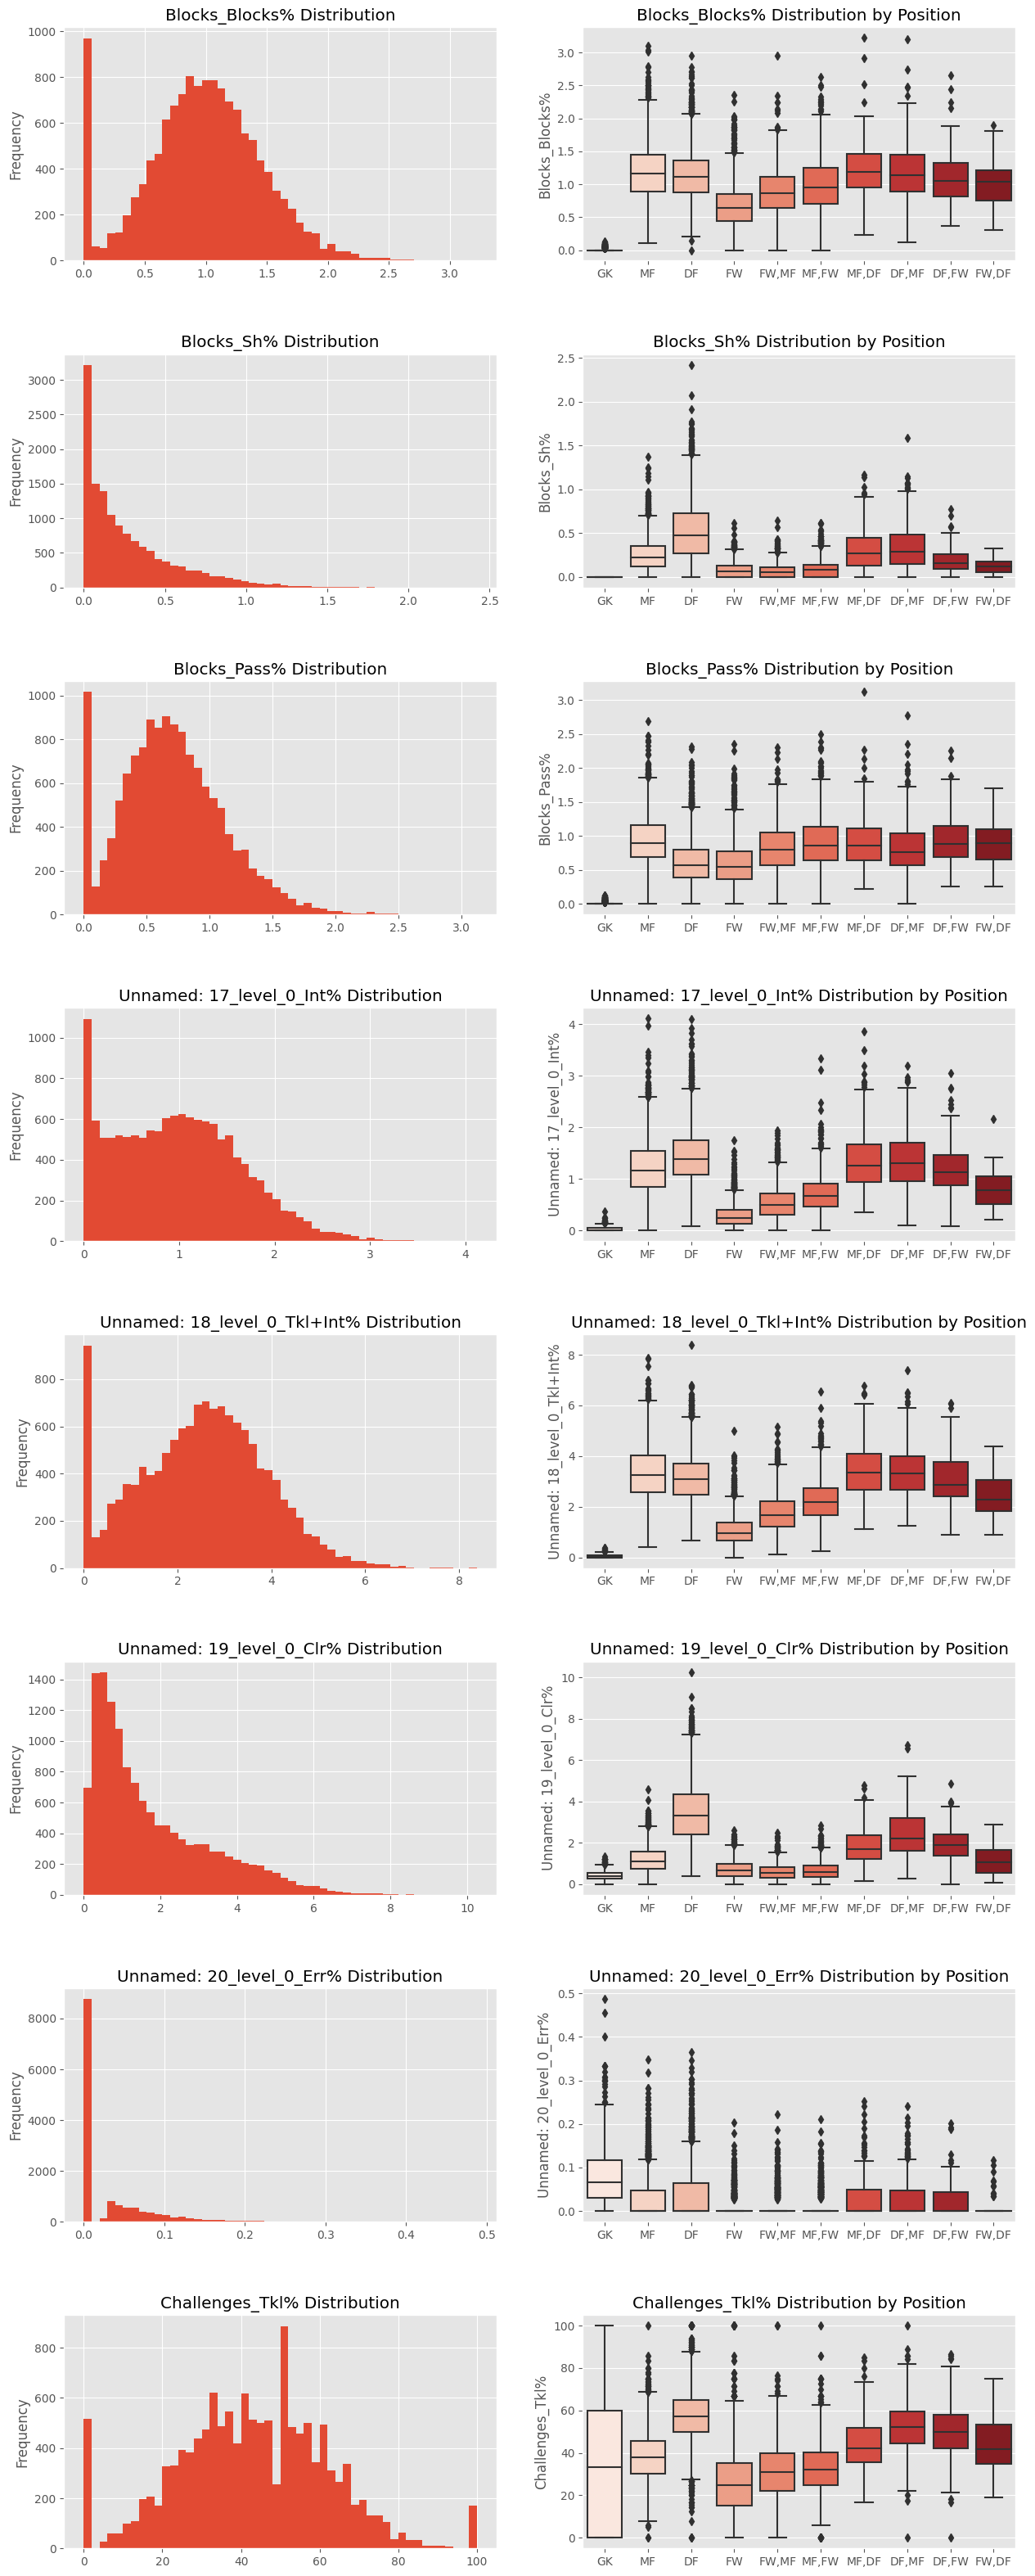

In [117]:
fig,axes=plt.subplots(8,2,figsize=(15,40))
for i,col in enumerate(defensive_actions.columns[-7:].tolist()+['Challenges_Tkl%']):
    ax1,ax2 = axes[i,0],axes[i,1]
    defensive_actions.query('`Unnamed: 4_level_0_90s`>7')[col].plot(ax=ax1,kind='hist',bins=50)
    sns.boxplot(defensive_actions.query('`Unnamed: 4_level_0_90s`>7'),x=['Unnamed: 2_level_0_Pos','Unnamed: 3_level_0_Age'][0],y=col,ax=ax2,palette='Reds') # by Age or Position
    ax1.set_title(f'{col} Distribution')
    ax2.set_title(f'{col} Distribution by Position')
    ax2.set_xlabel('')
plt.subplots_adjust(hspace=0.4)
plt.show()

In [118]:
#players with the highest Error rate per 90s in 2022-2023 Season

defensive_actions.query('`Unnamed: 4_level_0_90s`>10 and Season=="2022-2023"').sort_values('Unnamed: 20_level_0_Err%',ascending=False).head(10)\
[['Season','League','Team','Unnamed: 0_level_0_Player','Unnamed: 1_level_0_Nation','Unnamed: 20_level_0_Err%']]\
.style.background_gradient(cmap='Reds')

#Dayot Upamecano!!!

,Season,League,Team,Unnamed: 0_level_0_Player,Unnamed: 1_level_0_Nation,Unnamed: 20_level_0_Err%
20774,2022-2023,LaLiga,Girona,Paulo Gazzaniga,ar ARG,0.285714
23278,2022-2023,PrimeiraLiga,Estoril,Loreintz Rosier,fr FRA,0.260870
22648,2022-2023,EreDivisie,Vitesse,Kjell Scherpen,nl NED,0.240964
20802,2022-2023,LaLiga,Sevilla,Tanguy Nianzou,fr FRA,0.218978
20352,2022-2023,Bundesliga,Stuttgart,Florian Müller,de GER,0.210526
21272,2022-2023,Ligue1,Reims,Yehvann Diouf,fr FRA,0.200000
22032,2022-2023,SeriaA,Sassuolo,Ruan,br BRA,0.194175
19416,2022-2023,EPL,Tottenham,Hugo Lloris,fr FRA,0.190476
19920,2022-2023,Bundesliga,Bayern Munich,Dayot Upamecano,fr FRA,0.190476
22625,2022-2023,EreDivisie,Go Ahead Eag,Gerrit Nauber,de GER,0.190476


# ANALYZING possession 

In [119]:
cols=['Touches_Touches','Touches_Touches','Carries_PrgDist','Carries_PrgC','Carries_CPA','Carries_Mis','Carries_Dis','Receiving_PrgR']

for col in cols:
    possession[f'{col}_90s']=possession[col]/possession['Unnamed: 4_level_0_90s']

In [120]:
possession

,Season,League,Team,Unnamed: 0_level_0_Player,Unnamed: 1_level_0_Nation,Unnamed: 2_level_0_Pos,Unnamed: 3_level_0_Age,Unnamed: 4_level_0_90s,Touches_Touches,Touches_Def Pen,Touches_Def 3rd,Touches_Mid 3rd,Touches_Att 3rd,Touches_Att Pen,Touches_Live,Take-Ons_Att,Take-Ons_Succ,Take-Ons_Succ%,Take-Ons_Tkld,Take-Ons_Tkld%,Carries_Carries,Carries_TotDist,Carries_PrgDist,Carries_PrgC,Carries_1/3,Carries_CPA,Carries_Mis,Carries_Dis,Receiving_Rec,Receiving_PrgR,Unnamed: 27_level_0_Matches,Touches_Touches_90s,Carries_PrgDist_90s,Carries_PrgC_90s,Carries_CPA_90s,Carries_Mis_90s,Carries_Dis_90s,Receiving_PrgR_90s
0,2017-2018,EPL,Manchester City,Ederson,br BRA,GK,23.0,35.5,1156.0,961.0,1144.0,14.0,0.0,0.0,1156.0,1.0,1.0,100.0,0.0,0.0,641.0,3008.0,1941.0,0.0,0.0,0.0,3.0,1.0,624.0,0.0,Matches,32.563380,54.676056,0.000000,0.000000,0.084507,0.028169,0.000000
1,2017-2018,EPL,Manchester City,Kevin De Bruyne,be BEL,MF,26.0,34.1,3348.0,20.0,246.0,1565.0,1582.0,83.0,3348.0,87.0,63.0,72.4,23.0,26.4,2150.0,12041.0,7119.0,183.0,174.0,30.0,64.0,60.0,2615.0,259.0,Matches,98.181818,208.768328,5.366569,0.879765,1.876833,1.759531,7.595308
2,2017-2018,EPL,Manchester City,Nicolás Otamendi,ar ARG,DF,29.0,33.0,3407.0,154.0,1127.0,2122.0,167.0,38.0,3407.0,7.0,5.0,71.4,2.0,28.6,2428.0,15364.0,9940.0,92.0,60.0,0.0,19.0,1.0,2626.0,8.0,Matches,103.242424,301.212121,2.787879,0.000000,0.575758,0.030303,0.242424
3,2017-2018,EPL,Manchester City,Fernandinho,br BRA,MF,32.0,32.0,3319.0,89.0,580.0,2219.0,537.0,42.0,3319.0,25.0,22.0,88.0,3.0,12.0,2088.0,10091.0,6419.0,80.0,78.0,5.0,35.0,20.0,2567.0,38.0,Matches,103.718750,200.593750,2.500000,0.156250,1.093750,0.625000,1.187500
4,2017-2018,EPL,Manchester City,Kyle Walker,eng ENG,DF,27.0,30.9,2929.0,65.0,570.0,1628.0,757.0,36.0,2929.0,38.0,26.0,68.4,12.0,31.6,1704.0,8779.0,4864.0,105.0,78.0,10.0,32.0,18.0,2065.0,190.0,Matches,94.789644,157.411003,3.398058,0.323625,1.035599,0.582524,6.148867
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23409,2022-2023,PrimeiraLiga,Santa Clara,Andrezinho,pt POR,"DF,MF",26-102,1.6,89.0,4.0,16.0,44.0,31.0,5.0,89.0,4.0,2.0,50.0,1.0,25.0,45.0,382.0,165.0,4.0,2.0,1.0,5.0,1.0,42.0,7.0,Matches,55.625000,103.125000,2.500000,0.625000,3.125000,0.625000,4.375000
23410,2022-2023,PrimeiraLiga,Santa Clara,Filip Stevanovic,rs SRB,"FW,MF",20-169,1.5,61.0,1.0,5.0,30.0,26.0,6.0,61.0,4.0,2.0,50.0,1.0,25.0,24.0,119.0,53.0,3.0,2.0,1.0,3.0,2.0,36.0,6.0,Matches,40.666667,35.333333,2.000000,0.666667,2.000000,1.333333,4.000000
23411,2022-2023,PrimeiraLiga,Santa Clara,Rodrigo Valente,pt POR,"MF,FW",22-026,1.1,50.0,4.0,12.0,21.0,19.0,5.0,50.0,3.0,1.0,33.3,1.0,33.3,23.0,133.0,71.0,2.0,2.0,1.0,1.0,1.0,32.0,1.0,Matches,45.454545,64.545455,1.818182,0.909091,0.909091,0.909091,0.909091
23412,2022-2023,PrimeiraLiga,Santa Clara,Rui Costa,pt POR,MF,27-021,0.5,16.0,0.0,0.0,3.0,13.0,0.0,16.0,4.0,2.0,50.0,2.0,50.0,10.0,38.0,3.0,0.0,0.0,0.0,1.0,0.0,13.0,2.0,Matches,32.000000,6.000000,0.000000,0.000000,2.000000,0.000000,4.000000


In [121]:
possession['Unnamed: 3_level_0_Age']=possession['Unnamed: 3_level_0_Age'].astype(str).apply(lambda x:float(x) if '-' not in x else float(x.split('-')[0]))

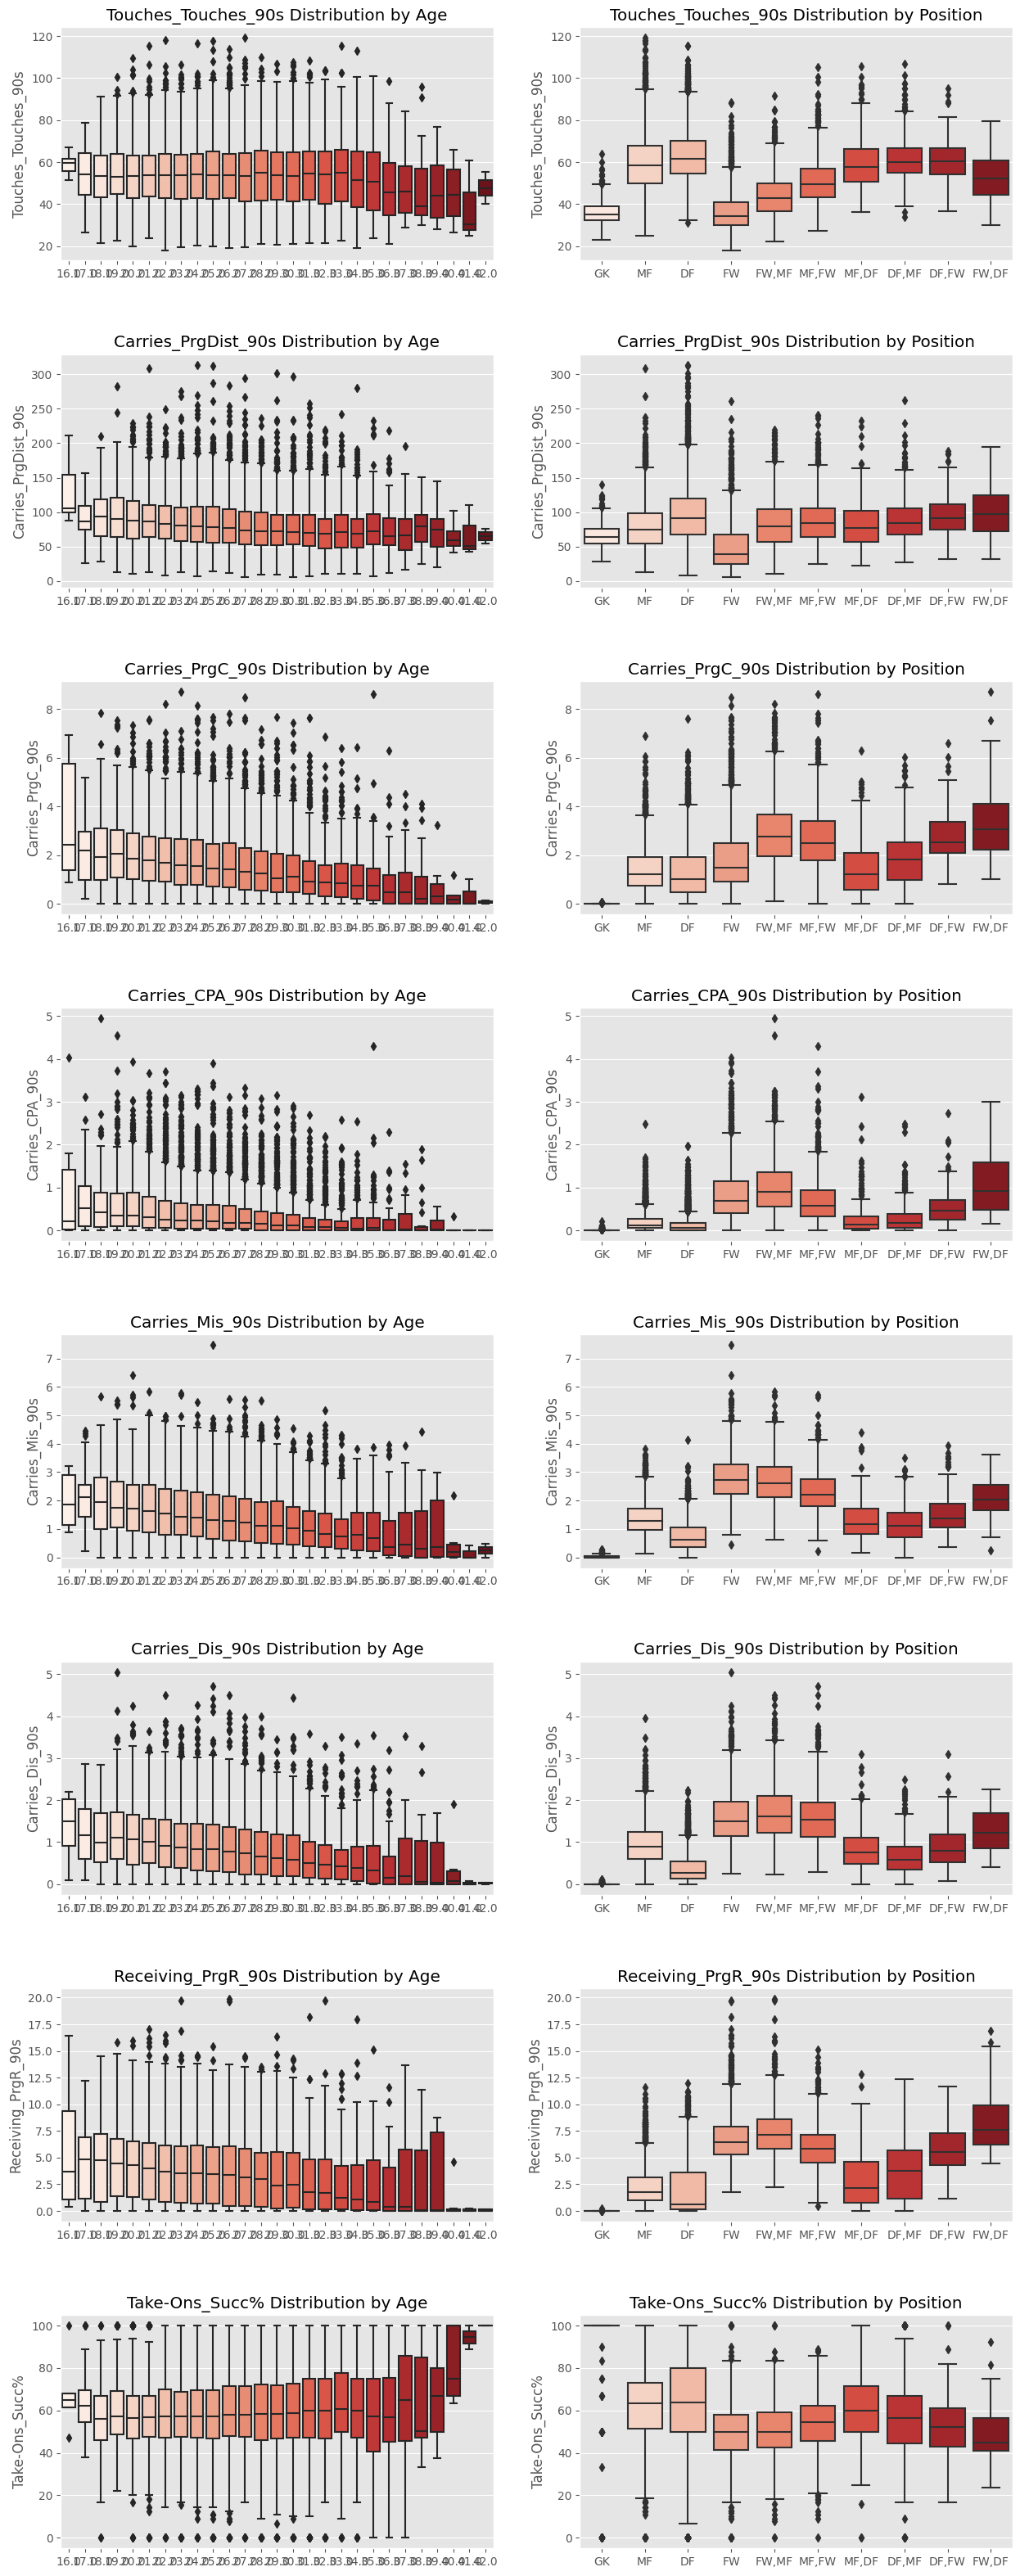

In [122]:
fig,axes=plt.subplots(8,2,figsize=(15,40))
for i,col in enumerate(possession.columns[-7:].tolist()+['Take-Ons_Succ%']):
    ax1,ax2=axes[i,0],axes[i,1]
    sns.boxplot(possession.query('`Unnamed: 4_level_0_90s`>7'),x='Unnamed: 3_level_0_Age',y=col,ax=ax1,palette='Reds')
    sns.boxplot(possession.query('`Unnamed: 4_level_0_90s`>7'),x='Unnamed: 2_level_0_Pos',y=col,ax=ax2,palette='Reds')
    ax1.set_title(f'{col} Distribution by Age')
    ax2.set_title(f'{col} Distribution by Position')
    ax1.set_xlabel('')
    ax2.set_xlabel('')
plt.subplots_adjust(hspace=0.4)
plt.show()

In [124]:
# top 10 footballers with the highest Progressive Carries coefficient per match

possession.query('`Unnamed: 4_level_0_90s`>7').sort_values('Carries_PrgC_90s',ascending=False).head(10)\
[['Season','League','Team','Unnamed: 0_level_0_Player','Unnamed: 1_level_0_Nation','Carries_PrgC_90s']]\
.style.background_gradient(cmap='Reds')

,Season,League,Team,Unnamed: 0_level_0_Player,Unnamed: 1_level_0_Nation,Carries_PrgC_90s
7007,2019-2020,EPL,Wolves,Adama Traoré,es ESP,8.719723
3449,2018-2019,Bundesliga,Bayern Munich,Franck Ribéry,fr FRA,8.615385
2941,2018-2019,EPL,Chelsea,Eden Hazard,be BEL,8.492308
3064,2018-2019,EPL,Wolves,Adama Traoré,es ESP,8.200000
16219,2021-2022,LaLiga,Barcelona,Ousmane Dembélé,fr FRA,8.152866
4026,2018-2019,LaLiga,Real Madrid,Vinicius Júnior,br BRA,7.835052
4543,2018-2019,Ligue1,Paris S-G,Neymar,br BRA,7.812500
1711,2017-2018,Ligue1,Paris S-G,Neymar,br BRA,7.676768
2358,2017-2018,SeriaA,Roma,Diego Perotti,ar ARG,7.653631
22301,2022-2023,EreDivisie,Feyenoord,Oussama Idrissi,ma MAR,7.634409


# Teams 

In [129]:
standard_stats['Unnamed: 1_level_0_Nation']=standard_stats['Unnamed: 1_level_0_Nation'].str.split(' ').str[-1].str.strip()

In [137]:
grouped=standard_stats.groupby(['Season','Team','Unnamed: 1_level_0_Nation'])['Unnamed: 0_level_0_Player'].count().reset_index()
grouped['Percent']=grouped.groupby(['Season','Team'])['Unnamed: 0_level_0_Player'].transform(lambda x:x/x.sum())*100
grouped=grouped.sort_values(['Season','Team','Percent'],ascending=[True,True,False])

In [142]:
grouped[grouped['Percent']>90]

#teams, where one country represents more than 90% of the total players
# Athletic Club Bilbao is leading in this aspect

,Season,Team,Unnamed: 1_level_0_Nation,Unnamed: 0_level_0_Player,Percent
69,2000-2001,Athletic Club,ESP,25,100.000000
1188,2001-2002,Athletic Club,ESP,26,100.000000
1281,2001-2002,Bologna,ITA,21,91.304348
1353,2001-2002,De Graafschap,NED,20,90.909091
1906,2001-2002,Piacenza,ITA,23,92.000000
2355,2002-2003,Athletic Club,ESP,27,100.000000
2586,2002-2003,Empoli,ITA,21,91.304348
2934,2002-2003,Modena,ITA,22,91.666667
3525,2003-2004,Athletic Club,ESP,25,100.000000
4715,2004-2005,Athletic Club,ESP,27,100.000000


In [149]:
grouped=standard_stats.groupby(['Season','Unnamed: 1_level_0_Nation'])['Unnamed: 1_level_0_Nation'].count().reset_index(name='Count')
grouped=grouped.sort_values(['Season','Count'],ascending=[True,False])

grouped=grouped.groupby('Season').head(20)

In [150]:
import plotly.express as px

In [161]:
fig=px.bar(grouped,x='Unnamed: 1_level_0_Nation',y='Count',
           color='Count',animation_frame='Season',
           color_continuous_scale='Reds',
          range_y=[0,550])
fig.update_layout(title_text='Top 20 Countries with the Most Players from Top Leagues per Season')
fig.update_xaxes(title_text=None)
fig.show()